Goal: Import NDVI (Normalized Difference Vegetation Index), LST (Land Surface temperature) 

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define folders where GeoTIFFs are stored
ndvi_folder = "NDVI_TIFFs"
lst_folder = "LST_TIFFs"

# Select years to visualize
selected_years = range(2010, 2024)

# Function to load a GeoTIFF file
def load_tiff(file_path):
    with rasterio.open(file_path) as dataset:
        array = dataset.read(1)  # Read first band
        profile = dataset.profile  # Metadata
    return array, profile

# Plot NDVI and LST for selected years
fig, axes = plt.subplots(len(selected_years), 2, figsize=(12, len(selected_years) * 5))

for i, year in enumerate(selected_years):
    # Define file paths
    ndvi_tif = os.path.join(ndvi_folder, f"NDVI_{year}.tif")
    lst_tif = os.path.join(lst_folder, f"LST_{year}.tif")

    # Load NDVI & LST
    if os.path.exists(ndvi_tif):
        ndvi_array, _ = load_tiff(ndvi_tif)
    else:
        ndvi_array = None  # Handle missing data

    if os.path.exists(lst_tif):
        lst_array, _ = load_tiff(lst_tif)
    else:
        lst_array = None  # Handle missing data

    # Plot NDVI
    if ndvi_array is not None:
        ax = axes[i, 0]
        img1 = ax.imshow(ndvi_array, cmap="RdYlGn", vmin=0, vmax=9000)
        ax.set_title(f"NDVI {year}")
        ax.axis("off")
        plt.colorbar(img1, ax=ax, fraction=0.02)

    # Plot LST
    if lst_array is not None:
        ax = axes[i, 1]
        img2 = ax.imshow(lst_array, cmap="hot", vmin=20, vmax=50)  # Adjust for region
        ax.set_title(f"LST {year} (°C)")
        ax.axis("off")
        plt.colorbar(img2, ax=ax, fraction=0.02)

plt.tight_layout()
plt.show()


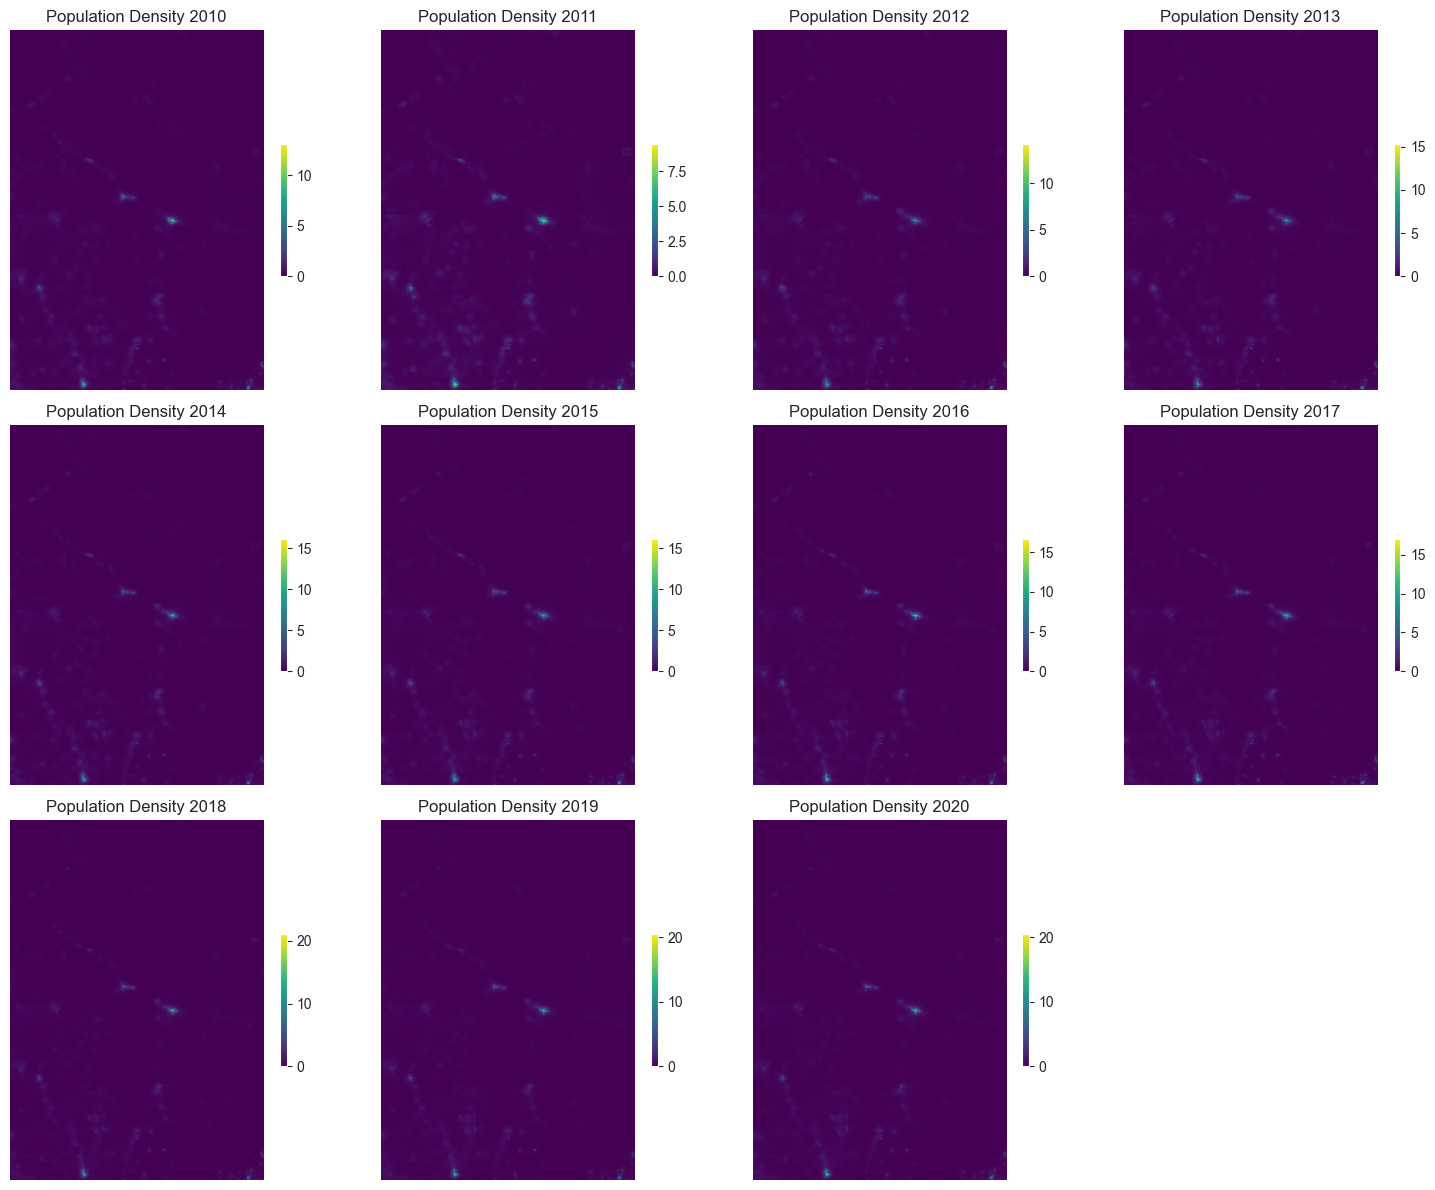

In [15]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define folder where population GeoTIFFs are stored
pop_folder = "Population_TIFFs"

# Get available GeoTIFF files
pop_files = sorted([f for f in os.listdir(pop_folder) if f.endswith(".tif")])

# Extract years from filenames (assuming format "Population_YYYY.tif")
years = [int(f.split("_")[1].split(".")[0]) for f in pop_files]

# Function to load a GeoTIFF file
def load_tiff(file_path):
    with rasterio.open(file_path) as dataset:
        array = dataset.read(1)  # Read first band
        profile = dataset.profile  # Metadata
    return array, profile

# Load all Population Density TIFFs into a dictionary
pop_data_by_year = {}
for year, file in zip(years, pop_files):
    pop_array, _ = load_tiff(os.path.join(pop_folder, file))
    pop_data_by_year[year] = pop_array

# Sort by year (just in case)
pop_data_by_year = dict(sorted(pop_data_by_year.items()))

# Select years for visualization
selected_years = list(pop_data_by_year.keys())  # Visualize all available years

# Create subplots dynamically
n_cols = 4  # Number of columns per row
n_rows = int(np.ceil(len(selected_years) / n_cols))  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each year's population density
for i, year in enumerate(selected_years):
    ax = axes[i]
    img = ax.imshow(pop_data_by_year[year], cmap="viridis", vmin=0, vmax=np.max(pop_data_by_year[year]))
    ax.set_title(f"Population Density {year}")
    ax.axis("off")
    plt.colorbar(img, ax=ax, fraction=0.02)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
